# Edge Disparity Tests

In [1]:
# Some path wizardry to make python acknowledge relative paths, just ignore this part...
import sys; sys.path.append('..')
import csv
import networkx as nx
from ipysigma import Sigma
from pelote import (
    table_to_bipartite_graph,
    monopartite_projection,
    edge_disparity,
    global_threshold_sparsification,
    graph_to_edges_dataframe,
    filter_edges,
    floatsam_threshold_learner
)

In [4]:
with open('../data/bipartite1.csv') as f:
    bipartite = table_to_bipartite_graph(csv.DictReader(f), 'account', 'url')

In [5]:
monopartite = monopartite_projection(bipartite, 'account', metric='jaccard')

In [6]:
nx.density(monopartite)

0.13238257655915675

In [7]:
d = edge_disparity(monopartite)

In [8]:
nx.set_edge_attributes(monopartite, d, 'disparity')

In [9]:
df = graph_to_edges_dataframe(monopartite)
df

,source,target,weight,disparity
0,0,2,0.083333,0.220927
1,0,3,0.090909,0.263974
2,0,4,0.062500,0.400665
3,0,5,0.090909,0.263974
4,0,147,0.083333,0.295072
...,...,...,...,...
95708,1861,1905,0.200000,0.078166
95709,1861,1896,0.083333,0.347533
95710,1890,1891,0.125000,0.249025
95711,1890,1938,0.125000,0.258497


<AxesSubplot: ylabel='Frequency'>

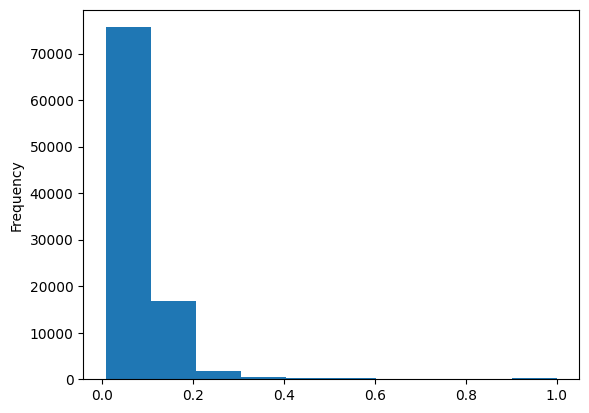

In [10]:
df.weight.plot.hist()

<AxesSubplot: ylabel='Frequency'>

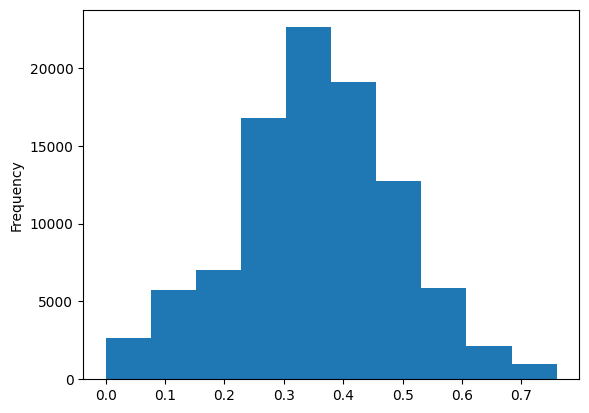

In [12]:
df.disparity.plot.hist()

In [13]:
df.disparity.describe()

count    95713.000000
mean         0.354853
std          0.136651
min          0.000013
25%          0.270572
50%          0.356349
75%          0.445207
max          0.759124
Name: disparity, dtype: float64

In [14]:
sparse = filter_edges(monopartite, lambda u, v, a: a['disparity'] <= 0.05)

In [15]:
nx.density(sparse)

0.0016265492674304256

In [16]:
Sigma(sparse)

Sigma(nx.Graph with 1,203 nodes and 1,176 edges)

In [17]:
nx.set_edge_attributes(monopartite, {(u, v): 1.0 - a['disparity'] for u, v, a in monopartite.edges.data()}, 'reverse_disparity')

In [18]:
next(iter(monopartite.edges.data()))

(0,
 2,
 {'weight': 0.08333333333333333,
  'disparity': 0.22092723767997471,
  'reverse_disparity': 0.7790727623200253})

In [19]:
threshold = floatsam_threshold_learner(monopartite, edge_weight_attr='reverse_disparity')
threshold

0.9300000000000006

In [20]:
sparse_per_floatsam = filter_edges(monopartite, lambda u, v, a: a['disparity'] <= 1 - threshold)

In [21]:
nx.density(sparse_per_floatsam)

0.0031382995644554726

In [22]:
Sigma(sparse_per_floatsam)

Sigma(nx.Graph with 1,203 nodes and 2,269 edges)